In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from ADVI import ADVI

In [2]:
covariance = np.array([[1,1.2],[1.2,2]]) #Connu
mean = np.array([-1,-3]) # A Estimer

In [3]:
def inv_T(x):
    return x
    
class gaussian():
    def __init__(self,mu,Sigma):
        self.mu = mu
        self.Sigma= Sigma
        self.M = len(self.mu)
        self.theta_size = self.M
    def log_gaussian(self,x,mu,sigma):
        return - 0.5*np.log((2*np.pi)**self.M*np.linalg.det(sigma))-(x-mu)@np.linalg.inv(sigma)@(x-mu).T/2
    def log_distr(self,X,theta):
        return self.log_gaussian(theta,self.mu,self.Sigma)+np.sum([self.log_gaussian(x,theta,covariance) for x in X],axis=0)#[np.random.choice(X.shape[0],size=100,replace=False)]]

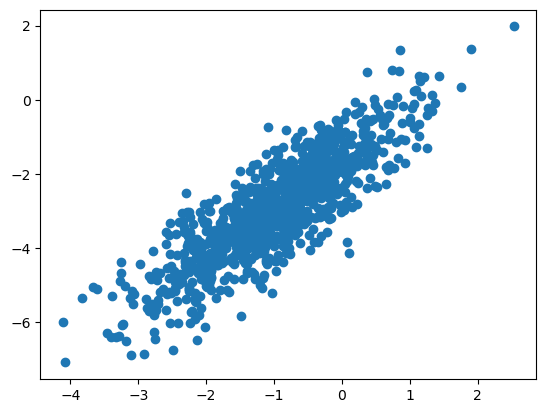

In [4]:
X = np.random.multivariate_normal(mean, covariance,1000)
plt.scatter(X[:,0],X[:,1])

In [5]:

model_ADVI = ADVI(inv_T,gaussian(np.zeros(2),1000*np.eye(2)),X,dependant=True)

In [6]:
model_ADVI.fit(lr=1,eps=1e-3,M=10,max_step=5000)

c:\Users\paulc\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
c:\Users\paulc\OneDrive\Documents\cs\3A\RL\echecs_et_apprentissage-master\qlearningconnect4\ADVI.py:90: RuntimeWarning: divide by zero encountered in scalar divide
  delta_ELBO = np.abs(new_ELBO-ELBO)/np.abs(ELBO)


2 [ 0.99966281 -0.99969242] [[0.9976566  0.00220787]
 [0.00220787 0.99829775]]
-6985.8335745003715 inf
3 [ 0.00768818 -0.60976304] [[ 1.42293921 -1.32286981]
 [-1.32286981  2.74269829]]
-7923.146496126526 0.13417338269373114
4 [ 0.60961185 -1.23192885] [[ 0.81585207 -0.42187845]
 [-0.42187845  1.38002977]]
-20323.849007734076 1.5651234667527623
5 [ 0.25720373 -1.15271652] [[0.65009649 0.18097507]
 [0.18097507 0.2646037 ]]
-9709.391000914478 0.5222661319113496
6 [ 0.31193396 -1.32794606] [[0.04958463 0.17505714]
 [0.17505714 0.74377275]]
-4865.192080948552 0.49891892493665935
7 [-0.01045149 -1.1782284 ] [[0.4718267  0.28950876]
 [0.28950876 0.17820327]]
-3775.383931179172 0.22400105312119623
8 [ 0.05472253 -1.34369857] [[0.34808097 0.30207706]
 [0.30207706 0.2745365 ]]
-3469.858567480493 0.08092564074755008
9 [ 0.08858515 -1.46033577] [[0.15826139 0.25420672]
 [0.25420672 0.45615691]]
-3313.7198292620415 0.04499858861158883
10 [ 0.00533481 -1.52109677] [[0.1658951  0.23030465]
 [0.23030

(array([-0.41895236, -2.07826929]),
 array([[0.20101078, 0.18132664],
        [0.29753848, 0.26107603]]))

In [7]:
model_ADVI2 = ADVI(inv_T,gaussian(np.zeros(2),1000*np.eye(2)),X,dependant=False)

model_ADVI2.fit(lr=1,eps=1e-3,M=10,max_step=5000)

2 [-0.99961637  0.99783018] [1.00010003 1.00019115]
-18372.958723786676 inf
3 [ 0.74411168 -1.20553075] [0.67986602 0.50838712]
-23438.669965058936 0.27571559471877016
4 [ 0.6105044  -1.30897137] [0.48465597 0.47921084]
-6564.66359838702 0.7199216675616297
5 [ 0.32394469 -1.22254924] [0.45265417 0.42845439]
-4955.726321551542 0.24509059035878153
6 [ 0.28820394 -1.37588773] [0.38513048 0.32245719]
-6208.752366002667 0.25284407635707107
7 [ 0.16618784 -1.4314905 ] [0.34694539 0.27362916]
-5194.8816341523925 0.16329701558109125
8 [ 0.16343427 -1.57759915] [0.33313779 0.26356858]
-3714.2340244486513 0.28502047091306376
9 [ 0.10849128 -1.64517508] [0.30363748 0.24586065]
-4317.455251636199 0.16240797516174044
10 [-0.02467065 -1.66526073] [0.28758018 0.23893576]
-3907.744981440011 0.09489624010368582
11 [-0.16637972 -1.64866727] [0.26934881 0.23164383]
-3867.117065653747 0.01039676743984779
12 [-0.22108734 -1.71755593] [0.25600877 0.21817656]
-3774.5176052901284 0.023945347087123783
13 [-0.2

(array([-0.85356572, -2.75502813]), array([-1.09187922, -1.19679262]))